In [1]:
from pathlib import Path
import pandas as pd

import torch
from effdet_model_1 import EfficientDetModel
from dataset_adaptor import CarsDatasetAdaptor

import matplotlib.pyplot as plt

from viz import draw_pascal_voc_bboxes

/home/curt/.pyenv/versions/3.8.7/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
/home/curt/.pyenv/versions/3.8.7/lib/python3.8/site-packages/pytorch_lightning/core/decorators.py:65: LightningDeprecationWarning: The `@auto_move_data` decorator is deprecated in v1.3 and will be removed in v1.5. Please use `trainer.predict` instead for inference. The decorator was applied to `forward`
  rank_zero_deprecation(


In [2]:
dataset_path = Path('/data/datasets/car_object_detection')
list(dataset_path.iterdir())

df = pd.read_csv(dataset_path/'train_solution_bounding_boxes (1).csv')

train_data_path = dataset_path/'training_images'
cars_train_ds = CarsDatasetAdaptor(train_data_path, df)

#test_data_path = dataset_path/'testing_images'
#cars_test_ds = CarsDatasetAdaptor(test_data_path, df)


In [3]:
model = EfficientDetModel(
    num_classes=1,
    img_size=512
    )

model.load_state_dict(torch.load('trained_effdet'))

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_after_downsample': False, 'conv_bn_relu_pattern': False, 'use_native_resize_op': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': True, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max

<All keys matched successfully>

In [4]:
_ = model.eval()

In [5]:
image1, truth_bboxes1, _, _ = cars_train_ds.get_image_and_labels_by_idx(0)
image2, truth_bboxes2, _, _ = cars_train_ds.get_image_and_labels_by_idx(1)

print(type(image1))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [6]:
images = [image1, image2]

In [7]:
predicted_bboxes, predicted_class_confidences, predicted_class_labels = model.predict(images)

/home/curt/.pyenv/versions/3.8.7/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/curt/.pyenv/versions/3.8.7/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [8]:
def compare_bboxes_for_image(
    image,
    predicted_bboxes,
    actual_bboxes,
    draw_bboxes_fn=draw_pascal_voc_bboxes,
    figsize=(20, 20),
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(image)
    ax1.set_title("Prediction")
    ax2.imshow(image)
    ax2.set_title("Actual")

    draw_bboxes_fn(ax1, predicted_bboxes)
    draw_bboxes_fn(ax2, actual_bboxes)

    plt.show()

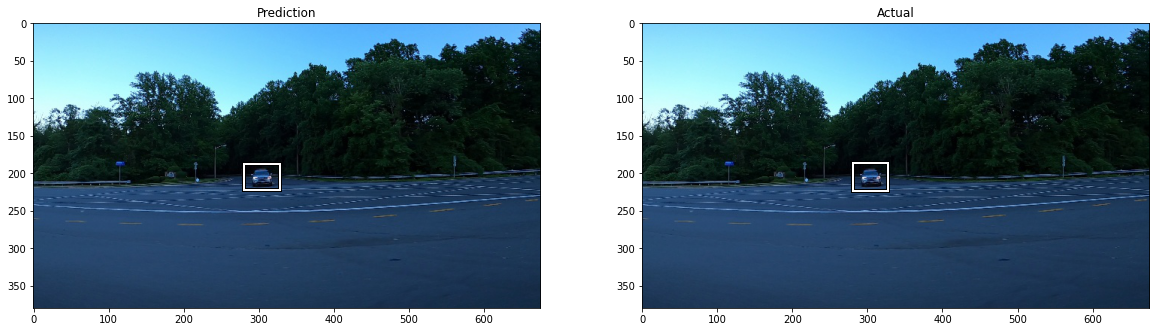

In [9]:
compare_bboxes_for_image(image1, predicted_bboxes=predicted_bboxes[0], actual_bboxes=truth_bboxes1.tolist())


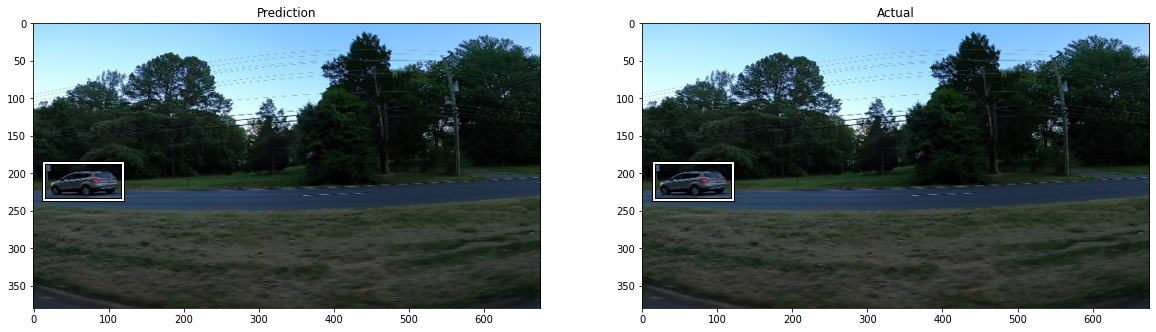

In [10]:
compare_bboxes_for_image(image2, predicted_bboxes=predicted_bboxes[1], actual_bboxes=truth_bboxes2.tolist())

In [11]:
scripted_efficient_det = torch.jit.load('scripted.torchscript')

In [12]:
scripted_model = EfficientDetModel(
    num_classes=1,
    img_size=512
    )
scripted_model.eval()
scripted_model.model.model = scripted_efficient_det

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_after_downsample': False, 'conv_bn_relu_pattern': False, 'use_native_resize_op': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': True, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max

In [13]:
print(type(model.model.model))
print(type(scripted_model.model.model))
print(scripted_model.model.training)

<class 'effdet.efficientdet.EfficientDet'>
<class 'torch.jit._script.RecursiveScriptModule'>
False


In [14]:
predicted_bboxes2, predicted_class_confidences2, predicted_class_labels2 = scripted_model.predict(images)

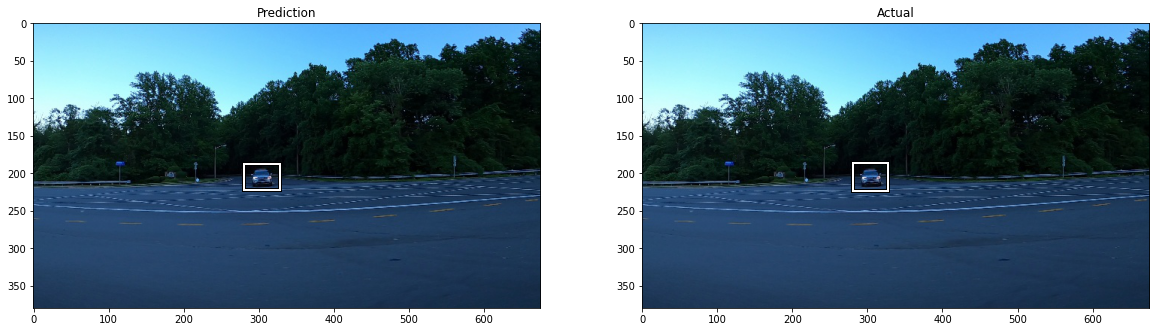

In [15]:
compare_bboxes_for_image(image1, predicted_bboxes=predicted_bboxes2[0], actual_bboxes=truth_bboxes1.tolist())

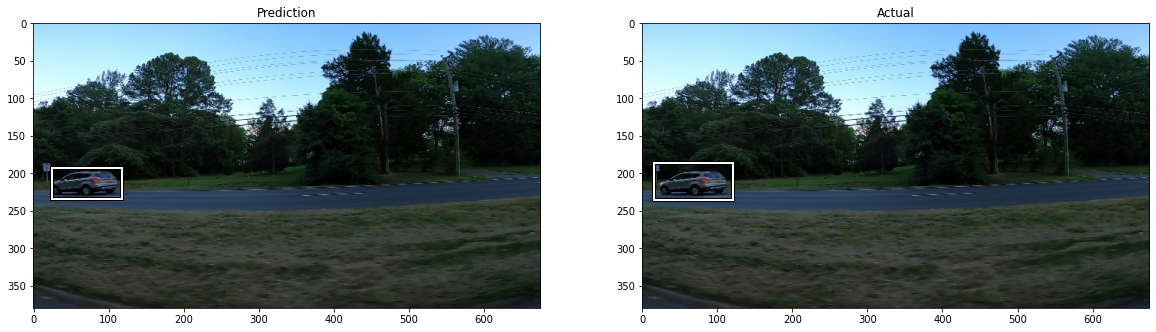

In [20]:
compare_bboxes_for_image(image2, predicted_bboxes=predicted_bboxes2[1], actual_bboxes=truth_bboxes2.tolist())